In [9]:
import os
import nibabel as nib
from glob import glob

In [4]:
cwd = os.getcwd()

In [25]:
all_images = glob(os.path.join(cwd,'3d_images','IMG*'))
image = nib.load(all_images[0])
len(all_images)

4

### Rozmiary obrazów

In [44]:
for img in all_images:
    print('Liczba bajtów:' + str(nib.load(img).get_fdata().nbytes))

Liczba bajtów:681574400
Liczba bajtów:975175680
Liczba bajtów:631242752
Liczba bajtów:245366784


In [47]:
# rozmiar pojedynczego przekroju
print('Liczba MB:' + str(nib.load(all_images[0]).get_fdata()[0].nbytes / 1000000))

Liczba MB:2.097152


### Nagłówek
Z nagłówka możemy wyczytać, że każdy voxel przechowuje 16 bitów oraz, że przechowywane są liczby typu int.
Obraz jest trójwymariowy (`dim[0]`) 325 x 512 x 512.

In [24]:
header = image.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 301 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       1.       0.546875 0.546875 1.       1.       1.       1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x   

In [11]:
image_tensor = image.get_fdata()

In [39]:
image_tensor.shape
image_tensor[0].nbytes

2097152

In [16]:
from skimage.util import montage
from matplotlib import pyplot as plt

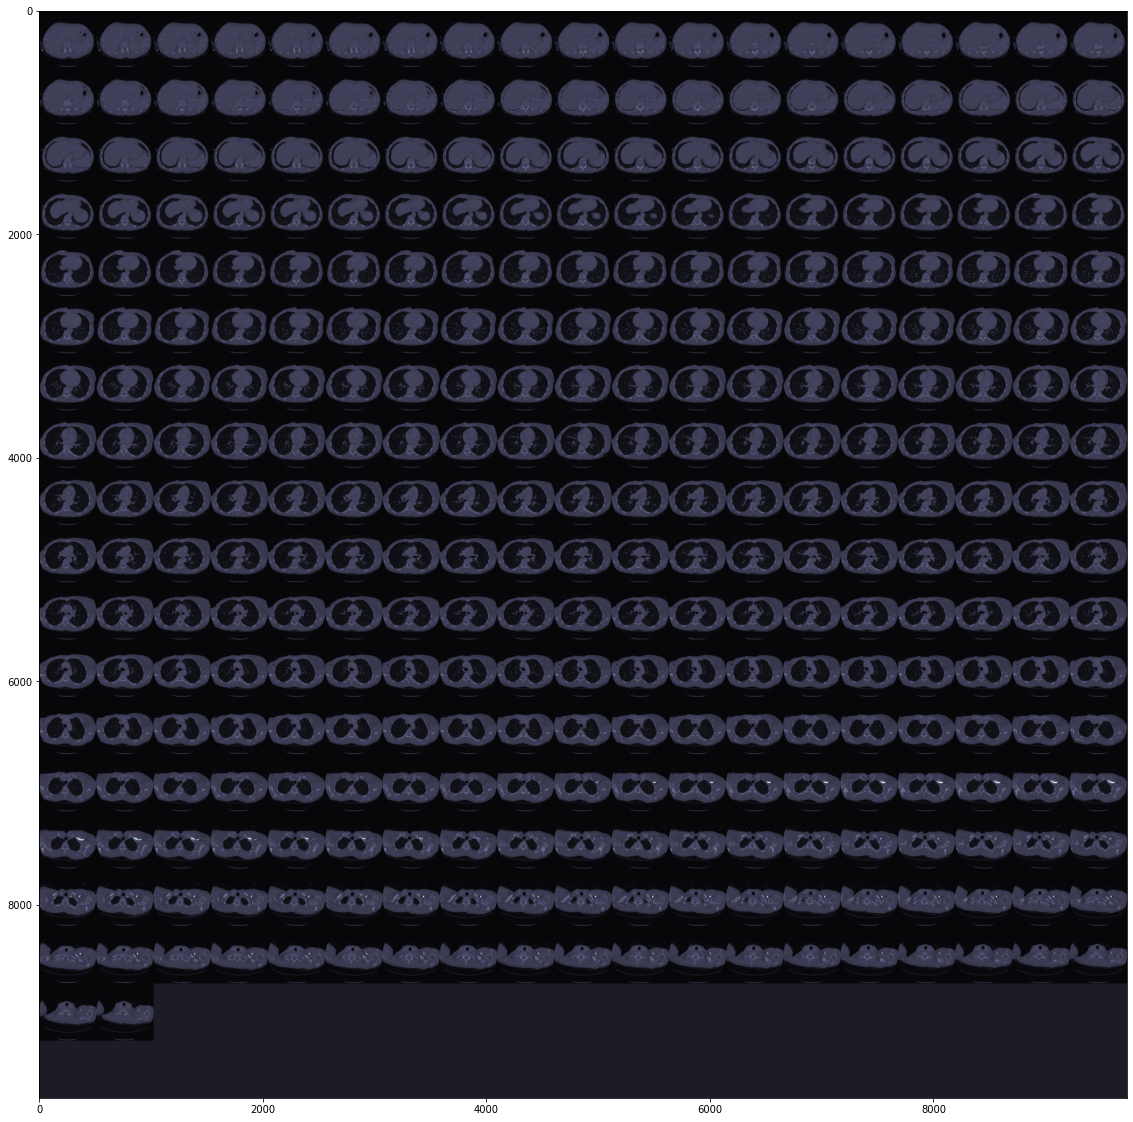

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage(image_tensor), cmap ='bone')